# Курсовой проект по курсу "Python для DataScience часть 2"

## Импорт библиотек

In [14]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
test_path = 'course_project_test.csv'
train_path = 'course_project_train.csv'

## Построение модели классификации

### 1. Обзор обучающего датасета

In [7]:
df_train = pd.read_csv(train_path)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [9]:
df_train.shape

(7500, 17)

Видим, что имеется 7500 наблюдений и 17 признаков, из них один признак - Credit Default - целевой.

In [10]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

Описание датасета:

    Home Ownership - домовладение,
    Annual Income - годовой доход,
    Years in current job - количество лет на текущем месте работы,
    Tax Liens - налоговые обременения,
    Number of Open Accounts - количество открытых счетов,
    Years of Credit History - количество лет кредитной истории,
    Maximum Open Credit - наибольший открытый кредит,
    Number of Credit Problems - количество проблем с кредитом,
    Months since last delinquent - количество месяцев с последней просрочки платежа,
    Bankruptcies - банкротства,
    Purpose - цель кредита,
    Term - срок кредита,
    Current Loan Amount - текущая сумма кредита,
    Current Credit Balance - текущий кредитный баланс,
    Monthly Debt - ежемесячный долг,
    Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

Видим (там, где менее 7500), что есть пропуски. Это касается 'Annual Income', т.е. не у всех известен годовой доход. Что касается поля 'Month since last delinquent', то пропуски (NaN) можно заменить большим числом (фактически не было правонарушений). Таким числом может быть практически бесконечный срок кредита - 50 лет (600 месяцев).

In [13]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


В целом, каких-то заоблачных значений нет, за исключением, возможно, суммы наибольшего открытого кредита кредита около 1300 млн. руб или текущей суммы кредита около 100 млн. руб. Из таблицы видно, что среднее значение 'Current Default' равно 0.28, что говорит о несбалансированности выборки (в данной выборке "дефолтников" около 28%).

### 2. Обработка выбросов

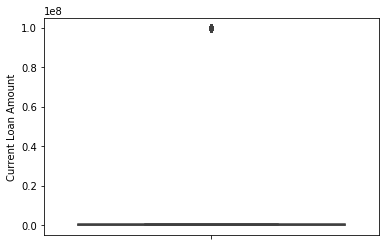

In [41]:
ax = sns.boxplot(y = df_train['Current Loan Amount'])

### 3. Обработка пропусков

4. Анализ данных\n",
    "5. Отбор признаков\n",
    "6. Балансировка классов\n",
    "7. Подбор моделей, получение бейзлана\n",
    "8. Выбор наилучшей модели, настройка гиперпараметров\n",
    "9. Проверка качества, борьба с переобучением\n",
    "10. Интерпретация результатов\n",
    "\n",
    "**Прогнозирование на тестовом датасете**\n",
    "1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков\n",
    "2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете\n",
    "3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)\n",
    "4. Соблюдать исходный порядок примеров из тестового датасета"

## Прогнозирование на тестовом датасете